In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pm
from pmdarima.arima import auto_arima

import statsmodels.api as sm

In [2]:
# Importing data and adding a date index with weekly dates

bev_df = pd.read_csv('Bev.csv')
bev_df

M.hi.p  M.lo.p  MET.hi.p  MET.lo.p  MET.sp.p  SEC.hi.p  SEC.lo.p  M.hi  \
0     59.25   29.19     63.67     26.03     50.09     58.56     29.19   458   
1     56.26   26.31     60.34     25.54     48.82     54.64     26.31   477   
2     56.26   26.25     60.79     25.69     48.56     57.90     26.25   539   
3     49.33   26.15     55.09     26.46     47.74     49.70     26.15   687   
4     61.34   25.88     65.09     25.72     50.75     63.72     25.88   389   
..      ...     ...       ...       ...       ...       ...       ...   ...   
171   60.84   28.31     59.84     28.20     46.28     59.49     28.31   413   
172   55.98   28.25     55.89     28.10     45.60     55.96     28.25   462   
173   59.34   29.21     59.81     29.24     46.34     57.81     29.21   604   
174   53.49   28.33     57.17     28.38     45.08     58.14     28.33   525   
175   58.30   28.17     58.44     28.52     45.77     56.21     28.17   409   

     M.lo  MET.hi  MET.lo  MET.sp  SEC.hi  SEC.lo  
0    1455    2037    3437     468     156     544  
1    1756    1700    3436     464     151     624  
2    2296    1747    3304     490     178     611  
3    3240    2371    3864     657     217     646  
4    2252    1741    3406     439     141     624  
..    ...     ...     ...     ...     ...     ...  
171  1693    1711    2984     566     151     584  
172  1631    1326    2940     658     168     588  
173  2316    2396    3761     750     244     629  
174  1648    1445    2928     557     155     521  
175  1854    1444    2951     527     168     556  

[176 rows x 14 columns]

In [3]:
# Create the dates object as an index for your DataFrame
dates = pd.date_range(start="2014-01-19", periods=bev_df.shape[0], freq='W')

bev_df.set_index(dates, inplace=True)

bev_df

M.hi.p  M.lo.p  MET.hi.p  MET.lo.p  MET.sp.p  SEC.hi.p  SEC.lo.p  \
2014-01-19   59.25   29.19     63.67     26.03     50.09     58.56     29.19   
2014-01-26   56.26   26.31     60.34     25.54     48.82     54.64     26.31   
2014-02-02   56.26   26.25     60.79     25.69     48.56     57.90     26.25   
2014-02-09   49.33   26.15     55.09     26.46     47.74     49.70     26.15   
2014-02-16   61.34   25.88     65.09     25.72     50.75     63.72     25.88   
...            ...     ...       ...       ...       ...       ...       ...   
2017-04-30   60.84   28.31     59.84     28.20     46.28     59.49     28.31   
2017-05-07   55.98   28.25     55.89     28.10     45.60     55.96     28.25   
2017-05-14   59.34   29.21     59.81     29.24     46.34     57.81     29.21   
2017-05-21   53.49   28.33     57.17     28.38     45.08     58.14     28.33   
2017-05-28   58.30   28.17     58.44     28.52     45.77     56.21     28.17   

            M.hi  M.lo  MET.hi  MET.lo  MET.sp  SEC.hi  SEC.lo  
2014-01-19   458  1455    2037    3437     468     156     544  
2014-01-26   477  1756    1700    3436     464     151     624  
2014-02-02   539  2296    1747    3304     490     178     611  
2014-02-09   687  3240    2371    3864     657     217     646  
2014-02-16   389  2252    1741    3406     439     141     624  
...          ...   ...     ...     ...     ...     ...     ...  
2017-04-30   413  1693    1711    2984     566     151     584  
2017-05-07   462  1631    1326    2940     658     168     588  
2017-05-14   604  2316    2396    3761     750     244     629  
2017-05-21   525  1648    1445    2928     557     155     521  
2017-05-28   409  1854    1444    2951     527     168     556  

[176 rows x 14 columns]

Plotting / visualizing data

Here in the exercises you will be working with the metropolitan areas of the state to forecast their products.

There are three products in the metropolitan areas - high end, low end, and specialty. The specialty product is not sold any where else in the state. The column names for the sales of these three products are MET.hi, MET.lo, and MET.sp respectively. Before looking at each one of these products individually, let's plot how total sales are going in the metropolitan region. 

In [4]:
# Create the individual region sales as their own objects
MET_hi = bev_df['MET.hi']
MET_lo = bev_df['MET.lo']
MET_sp = bev_df['MET.sp']

# Sum the region sales together
MET_t = MET_hi + MET_lo + MET_sp

MET_t

2014-01-19    5942
2014-01-26    5600
2014-02-02    5541
2014-02-09    6892
2014-02-16    5586
              ... 
2017-04-30    5261
2017-05-07    4924
2017-05-14    6907
2017-05-21    4930
2017-05-28    4922
Freq: W-SUN, Length: 176, dtype: int64

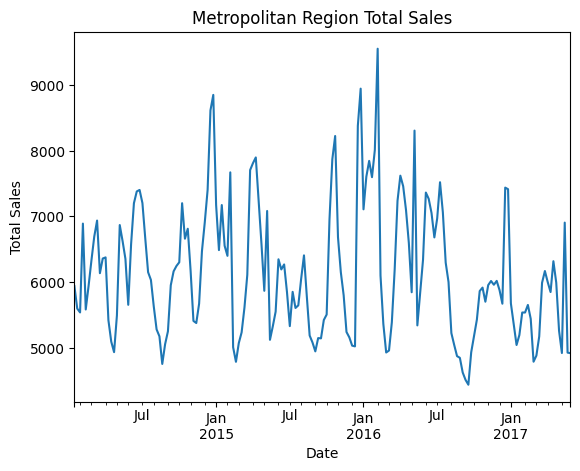

In [5]:
# Plot the metropolitan region total sales
MET_t.plot(title='Metropolitan Region Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [6]:
# ARIMA

# Split the data into training and validation
MET_t_train = MET_t[MET_t.index < "2017-01-01"]
MET_t_valid = MET_t[MET_t.index >= "2017-01-01"]

MET_t_train.shape, MET_t_valid.shape

((154,), (22,))

In [7]:
# Use auto.arima() function for metropolitan sales training data
MET_t_model = auto_arima(MET_t_train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(MET_t_model.summary())

C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3134.672, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2951.220, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2513.059, Time=0.04 sec


C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2512.969, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec


C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.16 sec


C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2486.488, Time=0.11 sec


C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2492.564, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2484.860, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2508.180, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2483.726, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2573.571, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2484.595, Time=0.03 sec


C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2486.708, Time=0.17 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.060 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  154
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1238.863
Date:                Thu, 16 Jan 2025   AIC                           2483.726
Time:                        10:07:31   BIC                           2492.837
Sample:                    01-19-2014   HQIC                          2487.427
                         - 12-25-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2037.9963    409.174      4.981      0.000    1236.030 

Best Model: ARIMA(1,0,0)(0,0,0)[0] with intercept

ARIMA(1,0,0): An AR(1) model with no differencing and no moving average component. 

The AR coefficient is 0.6740.

The intercept is the estimated mean of the stationary series after differencing: 2037.

Sigma¬≤ (ùúé2) represents the variance of the errors (residuals) in the model. It measures how much the observed values deviate from the model's predicted values.

In [8]:
MET_t_model

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

Forecast function

Previously you built a model and saved it as MET_t_model. Now we need to forecast out the values of this model for the first 5 months of 2017.

In [9]:
MET_t_train.index[-1]

Timestamp('2016-12-25 00:00:00')

In [10]:
# forecasting the next 22 periods immediately following the last observation in your training data MET_t_train (2016-12-25).
forecast_MET_t, conf_int = MET_t_model.predict(n_periods=22, return_conf_int=True)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Forecast': forecast_MET_t,
    'Lower CI': conf_int[:, 0],
    'Upper CI': conf_int[:, 1],
    'Real': MET_t_valid
})

# Create a date range for the forecast period
forecast_index = pd.date_range(start=MET_t_train.index[-1], periods=22, freq='W') # predicting 22 weeks after last date o the MET_t_train (2016-12-25).
forecast_df.index = forecast_index

forecast_df

C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Forecast     Lower CI     Upper CI  Real
2016-12-25  7035.640437  5556.047696  8515.233178  5679
2017-01-01  6779.955463  4995.672117  8564.238809  5360
2017-01-08  6607.626062  4700.948302  8514.303822  5046
2017-01-15  6491.477577  4531.723709  8451.231446  5198
2017-01-22  6413.194531  4429.799189  8396.589873  5540
2017-01-29  6360.432453  4366.390222  8354.474684  5540
2017-02-05  6324.871282  4326.011284  8323.731279  5655
2017-02-12  6300.903368  4299.858664  8301.948072  5444
2017-02-19  6284.749207  4282.712857  8286.785557  4792
2017-02-26  6273.861446  4271.374789  8276.348103  4885
2017-03-05  6266.523192  4263.832010  8269.214374  5177
2017-03-12  6261.577274  4258.793191  8264.361357  5992
2017-03-19  6258.243769  4255.417486  8261.070053  6171
2017-03-26  6255.997017  4253.151564  8258.842470  6002
2017-04-02  6254.482726  4251.628564  8257.336887  5851
2017-04-09  6253.462107  4250.603990  8256.320224  6320
2017-04-16  6252.774219  4249.914305  8255.634133  5995
2017-04-23  6252.310588  4249.449858  8255.171319  5261
2017-04-30  6251.998105  4249.137004  8254.859207  4924
2017-05-07  6251.787495  4248.926225  8254.648764  6907
2017-05-14  6251.645545  4248.784199  8254.506891  4930
2017-05-21  6251.549872  4248.688491  8254.411253  4922

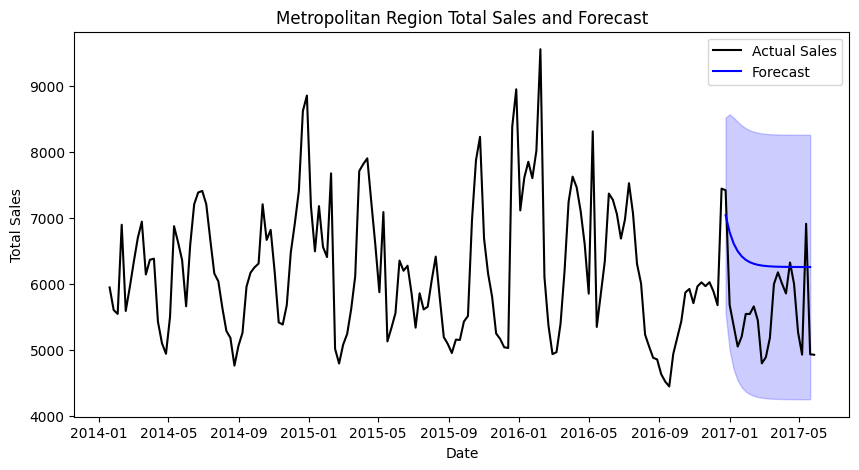

In [11]:
# Plot the actual sales data
plt.figure(figsize=(10, 5))
plt.plot(MET_t.index, MET_t, label='Actual Sales', color='black')

# Plot the forecasted values
plt.plot(forecast_index, forecast_MET_t, label='Forecast', color='blue')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.2)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Metropolitan Region Total Sales and Forecast')
plt.legend()

# Show the plot
plt.show()

Calculating MAPE and MAE

You previously calculated the forecast for the metropolitan region total sales and stored it in the object forecast_MET_t. You also have your validation data set stored in the object MET_t_valid that covers the same first 22 weeks of 2017. Let's see how good your forecast is!

In [12]:
# Calculate the MAE
MAE = np.mean(np.abs(forecast_MET_t - MET_t_valid))

# Calculate the MAPE
MAPE = 100 * np.mean(np.abs((forecast_MET_t - MET_t_valid) / MET_t_valid))

# Print to see how good your forecast is
print("MAE:", MAE)
print("MAPE:", MAPE)

# Your forecast seemed to be off by over 17% on average.

MAE: 899.4347514561719
MAPE: 17.11405616250262


Confidence Intervals for Forecast

Your forecast object forecast_MET_t not only has the forecast, but also margin of error calculations for the forecast called confidence intervals. These confidence intervals show us a wiggle room on our forecasts since no forecast is ever perfect.

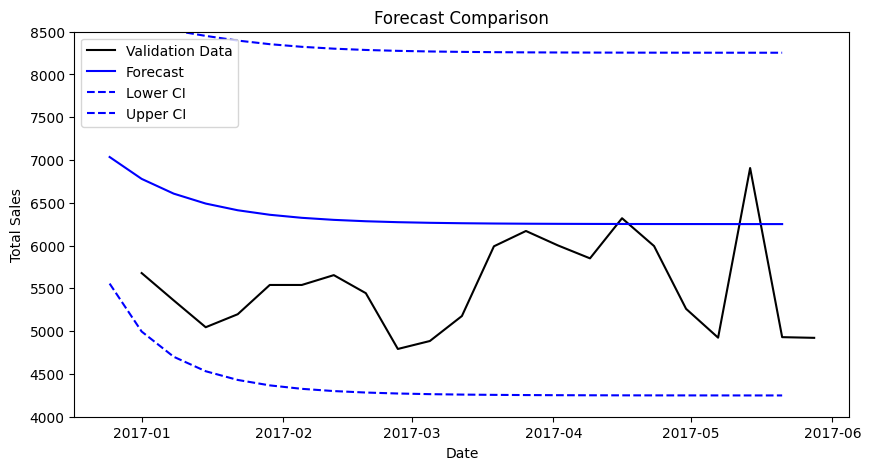

In [13]:
# Plot the validation data set
plt.figure(figsize=(10, 5))
plt.plot(MET_t_valid, label='Validation Data', color='black')
plt.ylim(4000, 8500)

# Overlay the forecast of 2017
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='blue')

# Adding confidence intervals of forecast to plot
plt.plot(forecast_df.index, forecast_df['Lower CI'], label='Lower CI', color='blue', linestyle='dashed')
plt.plot(forecast_df.index, forecast_df['Upper CI'], label='Upper CI', color='blue', linestyle='dashed')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Forecast Comparison')
plt.legend()

# Show the plot
plt.show()


Calculating price elasticity

Now that you know about price elasticities, let's see how elastic prices are for the high end product in the metropolitan region! Grand training and validation data sets stored in the objects bev_xts_train and bev_xts_valid.

You already have the sales for the high end product loaded in the workspace as MET_hi. You first need to extract the prices out of the bev_xts_train object. The column names for prices in the bev_xts_train object is MET.hi.p.

In [14]:
bev_xts_train = bev_df[bev_df.index < "2017-01-01"]
bev_xts_train

M.hi.p  M.lo.p  MET.hi.p  MET.lo.p  MET.sp.p  SEC.hi.p  SEC.lo.p  \
2014-01-19   59.25   29.19     63.67     26.03     50.09     58.56     29.19   
2014-01-26   56.26   26.31     60.34     25.54     48.82     54.64     26.31   
2014-02-02   56.26   26.25     60.79     25.69     48.56     57.90     26.25   
2014-02-09   49.33   26.15     55.09     26.46     47.74     49.70     26.15   
2014-02-16   61.34   25.88     65.09     25.72     50.75     63.72     25.88   
...            ...     ...       ...       ...       ...       ...       ...   
2016-11-27   58.40   28.58     60.15     28.35     45.59     59.01     28.58   
2016-12-04   60.25   28.80     62.40     28.79     47.05     65.17     28.80   
2016-12-11   58.83   29.37     59.56     29.02     45.23     61.44     29.37   
2016-12-18   57.91   28.35     59.82     27.67     45.08     57.82     28.35   
2016-12-25   58.38   28.33     59.66     28.14     46.16     61.80     28.33   

            M.hi  M.lo  MET.hi  MET.lo  MET.sp  SEC.hi  SEC.lo  
2014-01-19   458  1455    2037    3437     468     156     544  
2014-01-26   477  1756    1700    3436     464     151     624  
2014-02-02   539  2296    1747    3304     490     178     611  
2014-02-09   687  3240    2371    3864     657     217     646  
2014-02-16   389  2252    1741    3406     439     141     624  
...          ...   ...     ...     ...     ...     ...     ...  
2016-11-27   453  1174    2530    2924     567     157     550  
2016-12-04   381  1020    2595    2807     478     142     573  
2016-12-11   434  1060    2335    2788     551     143     537  
2016-12-18   653  1871    2984    3761     694     263     659  
2016-12-25   670  1881    2988    3722     705     243     645  

[154 rows x 14 columns]

In [15]:
bev_xts_valid = bev_df[bev_df.index >= "2017-01-01"]
bev_xts_valid

M.hi.p  M.lo.p  MET.hi.p  MET.lo.p  MET.sp.p  SEC.hi.p  SEC.lo.p  \
2017-01-01   54.75   28.41     56.81     28.62     45.16     52.34     28.41   
2017-01-08   54.71   28.98     56.42     28.52     44.14     53.40     28.98   
2017-01-15   68.11   28.95     67.42     28.75     47.16     61.90     28.95   
2017-01-22   62.95   28.48     64.89     28.71     47.23     65.40     28.48   
2017-01-29   61.42   28.67     61.08     28.96     47.42     62.06     28.67   
2017-02-05   57.07   29.79     59.56     30.41     45.56     58.89     29.79   
2017-02-12   58.18   28.52     61.16     28.67     45.92     58.67     28.52   
2017-02-19   59.06   28.84     57.52     26.96     45.86     57.83     28.84   
2017-02-26   61.80   28.58     62.93     28.82     46.48     60.47     28.58   
2017-03-05   61.91   29.03     62.59     29.09     47.47     63.95     29.03   
2017-03-12   59.22   29.17     62.88     28.13     46.58     60.89     29.17   
2017-03-19   56.88   26.47     59.55     27.18     45.65     57.35     26.47   
2017-03-26   58.96   27.35     60.54     27.81     45.67     58.85     27.35   
2017-04-02   56.59   29.25     61.61     29.53     47.72     57.71     29.25   
2017-04-09   61.74   28.15     60.31     28.86     45.93     60.98     28.15   
2017-04-16   57.80   27.09     59.14     27.83     44.88     58.47     27.09   
2017-04-23   62.39   28.59     64.43     28.46     47.01     59.49     28.59   
2017-04-30   60.84   28.31     59.84     28.20     46.28     59.49     28.31   
2017-05-07   55.98   28.25     55.89     28.10     45.60     55.96     28.25   
2017-05-14   59.34   29.21     59.81     29.24     46.34     57.81     29.21   
2017-05-21   53.49   28.33     57.17     28.38     45.08     58.14     28.33   
2017-05-28   58.30   28.17     58.44     28.52     45.77     56.21     28.17   

            M.hi  M.lo  MET.hi  MET.lo  MET.sp  SEC.hi  SEC.lo  
2017-01-01   507  1356    2118    2913     648     185     531  
2017-01-08   587  1490    1835    2873     652     183     527  
2017-01-15   453  1406    1644    2811     591     145     547  
2017-01-22   493  1454    1771    2860     567     133     575  
2017-01-29   467  1473    2033    2894     613     145     559  
2017-02-05   377  1294    2216    2701     623     155     539  
2017-02-12   361  1602    2164    2885     606     160     550  
2017-02-19   316  1706    1795    3102     547     155     564  
2017-02-26   350  1469    1436    2806     550     153     563  
2017-03-05   408  1361    1516    2823     546     136     501  
2017-03-12   419  1434    1580    3027     570     152     506  
2017-03-19   475  1584    2213    3180     599     158     610  
2017-03-26   496  1420    2540    3011     620     157     609  
2017-04-02   587  1221    2753    2708     541     164     550  
2017-04-09   498  1862    2433    2815     603     148     586  
2017-04-16   433  1780    2718    3031     571     160     582  
2017-04-23   394  1773    2496    2966     533     153     552  
2017-04-30   413  1693    1711    2984     566     151     584  
2017-05-07   462  1631    1326    2940     658     168     588  
2017-05-14   604  2316    2396    3761     750     244     629  
2017-05-21   525  1648    1445    2928     557     155     521  
2017-05-28   409  1854    1444    2951     527     168     556

In [16]:
# Save the prices of each product
l_MET_hi_p = np.log(bev_xts_train["MET.hi.p"])
l_MET_hi_p

2014-01-19    4.153713
2014-01-26    4.099995
2014-02-02    4.107425
2014-02-09    4.008968
2014-02-16    4.175771
                ...   
2016-11-27    4.096841
2016-12-04    4.133565
2016-12-11    4.086984
2016-12-18    4.091340
2016-12-25    4.088662
Freq: W-SUN, Name: MET.hi.p, Length: 154, dtype: float64

In [17]:
l_MET_hi = np.log(bev_xts_train["MET.hi"])
l_MET_hi

2014-01-19    7.619233
2014-01-26    7.438384
2014-02-02    7.465655
2014-02-09    7.771067
2014-02-16    7.462215
                ...   
2016-11-27    7.835975
2016-12-04    7.861342
2016-12-11    7.755767
2016-12-18    8.001020
2016-12-25    8.002360
Freq: W-SUN, Name: MET.hi, Length: 154, dtype: float64

In [18]:
# Save as a data frame
MET_hi_train = pd.DataFrame({
    'log_sales': l_MET_hi,
    'log_price': l_MET_hi_p
})

MET_hi_train

log_sales  log_price
2014-01-19   7.619233   4.153713
2014-01-26   7.438384   4.099995
2014-02-02   7.465655   4.107425
2014-02-09   7.771067   4.008968
2014-02-16   7.462215   4.175771
...               ...        ...
2016-11-27   7.835975   4.096841
2016-12-04   7.861342   4.133565
2016-12-11   7.755767   4.086984
2016-12-18   8.001020   4.091340
2016-12-25   8.002360   4.088662

[154 rows x 2 columns]

In [19]:
# Calculate the regression
X = MET_hi_train['log_price']
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = MET_hi_train['log_sales']

model_MET_hi = sm.OLS(y, X).fit()

print(model_MET_hi.summary())


                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     15.64
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           0.000117
Time:                        10:07:31   Log-Likelihood:                -50.732
No. Observations:                 154   AIC:                             105.5
Df Residuals:                     152   BIC:                             111.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9774      1.560      8.960      0.0

Visualize holiday / promotion effects

Maybe there are certain times of year that the metropolitan region has higher sales than other times. Let's visualize the sales of high end product to see if there may be some seasonal effects. Your product sales are saved in your workspace as MET_hi. The prices of your product is saved in your workspace as MET_hi_p.

In [20]:
MET_hi = bev_xts_train["MET.hi"]
MET_hi

2014-01-19    2037
2014-01-26    1700
2014-02-02    1747
2014-02-09    2371
2014-02-16    1741
              ... 
2016-11-27    2530
2016-12-04    2595
2016-12-11    2335
2016-12-18    2984
2016-12-25    2988
Freq: W-SUN, Name: MET.hi, Length: 154, dtype: int64

In [21]:
MET_hi_p = bev_xts_train["MET.hi.p"]
MET_hi_p

2014-01-19    63.67
2014-01-26    60.34
2014-02-02    60.79
2014-02-09    55.09
2014-02-16    65.09
              ...  
2016-11-27    60.15
2016-12-04    62.40
2016-12-11    59.56
2016-12-18    59.82
2016-12-25    59.66
Freq: W-SUN, Name: MET.hi.p, Length: 154, dtype: float64

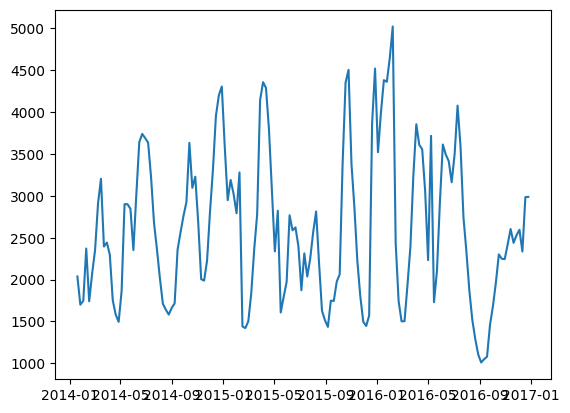

In [22]:
# Plot the product's sales
plt.plot(MET_hi)

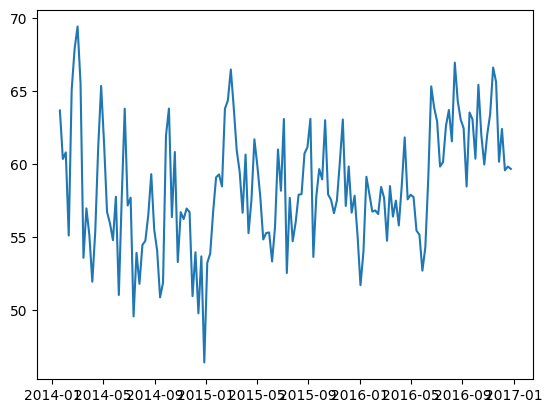

In [23]:
# Plot the product's price
plt.plot(MET_hi_p)

Create holiday / promotional effect variables

We saw some notion of seasonality in the previous exercise, but let's test to make sure that something actually is there. Your bosses think that their products would be more desired around the weeks of Christmas, New Year's, and Valentine's Day. The marketing department also mentions that they have been running promotional deals the week before Mother's Day the previous 5 years. Let's create a binary indicator variable for New Year's!

In [24]:
# Create date indices for New Year's week
n_dates = pd.to_datetime(["2014-12-28", "2015-12-27", "2016-12-25"])
n_dates

DatetimeIndex(['2014-12-28', '2015-12-27', '2016-12-25'], dtype='datetime64[ns]', freq=None)

In [25]:
# Create a DataFrame for New Year's
newyear = pd.DataFrame({'value': np.ones(len(n_dates))}, index=n_dates)
newyear

value
2014-12-28    1.0
2015-12-27    1.0
2016-12-25    1.0

In [26]:
# Create a sequence of 154 weeks for merging
dates_train = pd.date_range(start="2014-01-19", periods=154, freq='W')
dates_train

DatetimeIndex(['2014-01-19', '2014-01-26', '2014-02-02', '2014-02-09',
               '2014-02-16', '2014-02-23', '2014-03-02', '2014-03-09',
               '2014-03-16', '2014-03-23',
               ...
               '2016-10-23', '2016-10-30', '2016-11-06', '2016-11-13',
               '2016-11-20', '2016-11-27', '2016-12-04', '2016-12-11',
               '2016-12-18', '2016-12-25'],
              dtype='datetime64[ns]', length=154, freq='W-SUN')

In [27]:
# Merge training dates into New Year's object
all_dates = pd.DataFrame(index=dates_train)
all_dates

Empty DataFrame
Columns: []
Index: [2014-01-19 00:00:00, 2014-01-26 00:00:00, 2014-02-02 00:00:00, 2014-02-09 00:00:00, 2014-02-16 00:00:00, 2014-02-23 00:00:00, 2014-03-02 00:00:00, 2014-03-09 00:00:00, 2014-03-16 00:00:00, 2014-03-23 00:00:00, 2014-03-30 00:00:00, 2014-04-06 00:00:00, 2014-04-13 00:00:00, 2014-04-20 00:00:00, 2014-04-27 00:00:00, 2014-05-04 00:00:00, 2014-05-11 00:00:00, 2014-05-18 00:00:00, 2014-05-25 00:00:00, 2014-06-01 00:00:00, 2014-06-08 00:00:00, 2014-06-15 00:00:00, 2014-06-22 00:00:00, 2014-06-29 00:00:00, 2014-07-06 00:00:00, 2014-07-13 00:00:00, 2014-07-20 00:00:00, 2014-07-27 00:00:00, 2014-08-03 00:00:00, 2014-08-10 00:00:00, 2014-08-17 00:00:00, 2014-08-24 00:00:00, 2014-08-31 00:00:00, 2014-09-07 00:00:00, 2014-09-14 00:00:00, 2014-09-21 00:00:00, 2014-09-28 00:00:00, 2014-10-05 00:00:00, 2014-10-12 00:00:00, 2014-10-19 00:00:00, 2014-10-26 00:00:00, 2014-11-02 00:00:00, 2014-11-09 00:00:00, 2014-11-16 00:00:00, 2014-11-23 00:00:00, 2014-11-30 00:00:00, 2014-12-07 00:00:00, 2014-12-14 00:00:00, 2014-12-21 00:00:00, 2014-12-28 00:00:00, 2015-01-04 00:00:00, 2015-01-11 00:00:00, 2015-01-18 00:00:00, 2015-01-25 00:00:00, 2015-02-01 00:00:00, 2015-02-08 00:00:00, 2015-02-15 00:00:00, 2015-02-22 00:00:00, 2015-03-01 00:00:00, 2015-03-08 00:00:00, 2015-03-15 00:00:00, 2015-03-22 00:00:00, 2015-03-29 00:00:00, 2015-04-05 00:00:00, 2015-04-12 00:00:00, 2015-04-19 00:00:00, 2015-04-26 00:00:00, 2015-05-03 00:00:00, 2015-05-10 00:00:00, 2015-05-17 00:00:00, 2015-05-24 00:00:00, 2015-05-31 00:00:00, 2015-06-07 00:00:00, 2015-06-14 00:00:00, 2015-06-21 00:00:00, 2015-06-28 00:00:00, 2015-07-05 00:00:00, 2015-07-12 00:00:00, 2015-07-19 00:00:00, 2015-07-26 00:00:00, 2015-08-02 00:00:00, 2015-08-09 00:00:00, 2015-08-16 00:00:00, 2015-08-23 00:00:00, 2015-08-30 00:00:00, 2015-09-06 00:00:00, 2015-09-13 00:00:00, 2015-09-20 00:00:00, 2015-09-27 00:00:00, 2015-10-04 00:00:00, 2015-10-11 00:00:00, 2015-10-18 00:00:00, 2015-10-25 00:00:00, 2015-11-01 00:00:00, 2015-11-08 00:00:00, 2015-11-15 00:00:00, 2015-11-22 00:00:00, 2015-11-29 00:00:00, 2015-12-06 00:00:00, 2015-12-13 00:00:00, ...]

[154 rows x 0 columns]

In [28]:
newyear = all_dates.join(newyear, how='left').fillna(0)
newyear

value
2014-01-19    0.0
2014-01-26    0.0
2014-02-02    0.0
2014-02-09    0.0
2014-02-16    0.0
...           ...
2016-11-27    0.0
2016-12-04    0.0
2016-12-11    0.0
2016-12-18    0.0
2016-12-25    1.0

[154 rows x 1 columns]

In [29]:
MET_hi_train

log_sales  log_price
2014-01-19   7.619233   4.153713
2014-01-26   7.438384   4.099995
2014-02-02   7.465655   4.107425
2014-02-09   7.771067   4.008968
2014-02-16   7.462215   4.175771
...               ...        ...
2016-11-27   7.835975   4.096841
2016-12-04   7.861342   4.133565
2016-12-11   7.755767   4.086984
2016-12-18   8.001020   4.091340
2016-12-25   8.002360   4.088662

[154 rows x 2 columns]

In [30]:
# Create MET_hi_train_2 by adding newyear
MET_hi_train_2 = MET_hi_train.copy()
MET_hi_train_2['newyear'] = newyear['value'].values
MET_hi_train_2


log_sales  log_price  newyear
2014-01-19   7.619233   4.153713      0.0
2014-01-26   7.438384   4.099995      0.0
2014-02-02   7.465655   4.107425      0.0
2014-02-09   7.771067   4.008968      0.0
2014-02-16   7.462215   4.175771      0.0
...               ...        ...      ...
2016-11-27   7.835975   4.096841      0.0
2016-12-04   7.861342   4.133565      0.0
2016-12-11   7.755767   4.086984      0.0
2016-12-18   8.001020   4.091340      0.0
2016-12-25   8.002360   4.088662      1.0

[154 rows x 3 columns]

In [31]:
# Build regressions for the product
X = MET_hi_train_2[['log_price', 'newyear']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

y = MET_hi_train_2['log_sales']

# Fit the model
model_MET_hi_full = sm.OLS(y, X).fit()

print(model_MET_hi_full.summary())


                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     9.352
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           0.000148
Time:                        10:07:32   Log-Likelihood:                -49.282
No. Observations:                 154   AIC:                             104.6
Df Residuals:                     151   BIC:                             113.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5083      1.575      8.576      0.0

In [32]:
# Define the dates for Valentine's Day, Christmas, and Mother's Day for multiple years
valentine_dates = pd.to_datetime(["2014-02-14", "2015-02-14", "2016-02-14"])
christmas_dates = pd.to_datetime(["2014-12-25", "2015-12-25", "2016-12-25"])
mother_dates = pd.to_datetime(["2014-05-11", "2015-05-10", "2016-05-08"])  # Example dates for Mother's Day

# Create binary features for each special day
valentine = pd.DataFrame({'valentine': np.ones(len(valentine_dates))}, index=valentine_dates)
christmas = pd.DataFrame({'christmas': np.ones(len(christmas_dates))}, index=christmas_dates)
mother = pd.DataFrame({'mother': np.ones(len(mother_dates))}, index=mother_dates)

# Create a DataFrame with all the dates for merging
all_dates = pd.DataFrame(index=dates_train)

# Merge the special days into the main DataFrame
valentine = all_dates.join(valentine, how='left').fillna(0)
christmas = all_dates.join(christmas, how='left').fillna(0)
mother = all_dates.join(mother, how='left').fillna(0)

# Combine all special days into MET_hi_train_2
MET_hi_train_2 = MET_hi_train.copy()
MET_hi_train_2['newyear'] = newyear['value'].values
MET_hi_train_2['valentine'] = valentine['valentine'].values
MET_hi_train_2['christmas'] = christmas['christmas'].values
MET_hi_train_2['mother'] = mother['mother'].values

MET_hi_train_2


log_sales  log_price  newyear  valentine  christmas  mother
2014-01-19   7.619233   4.153713      0.0        0.0        0.0     0.0
2014-01-26   7.438384   4.099995      0.0        0.0        0.0     0.0
2014-02-02   7.465655   4.107425      0.0        0.0        0.0     0.0
2014-02-09   7.771067   4.008968      0.0        0.0        0.0     0.0
2014-02-16   7.462215   4.175771      0.0        0.0        0.0     0.0
...               ...        ...      ...        ...        ...     ...
2016-11-27   7.835975   4.096841      0.0        0.0        0.0     0.0
2016-12-04   7.861342   4.133565      0.0        0.0        0.0     0.0
2016-12-11   7.755767   4.086984      0.0        0.0        0.0     0.0
2016-12-18   8.001020   4.091340      0.0        0.0        0.0     0.0
2016-12-25   8.002360   4.088662      1.0        0.0        1.0     0.0

[154 rows x 6 columns]

In [33]:
# Build regressions for the product
X = MET_hi_train_2[['log_price', 'newyear', 'valentine', 'christmas', 'mother']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = MET_hi_train_2['log_sales']

# Fit the model
model_MET_hi_full = sm.OLS(y, X).fit()

print(model_MET_hi_full.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     4.001
Date:                Thu, 16 Jan 2025   Prob (F-statistic):            0.00196
Time:                        10:07:32   Log-Likelihood:                -48.511
No. Observations:                 154   AIC:                             109.0
Df Residuals:                     148   BIC:                             127.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3497      1.605      8.318      0.0

Create future predictor variables

To get forecasts for the regression models with price, holidays, and promotions we need future values for each of these inputs! For our high end product we previously determined holidays and promotions aren't important to the model. Prices are negotiated 6 months in advance, so the prices in the validation data set are reasonable to use for forecast calculations. Your validation data set is stored in your workspace as bev_xts_valid.

In [34]:
bev_xts_valid

M.hi.p  M.lo.p  MET.hi.p  MET.lo.p  MET.sp.p  SEC.hi.p  SEC.lo.p  \
2017-01-01   54.75   28.41     56.81     28.62     45.16     52.34     28.41   
2017-01-08   54.71   28.98     56.42     28.52     44.14     53.40     28.98   
2017-01-15   68.11   28.95     67.42     28.75     47.16     61.90     28.95   
2017-01-22   62.95   28.48     64.89     28.71     47.23     65.40     28.48   
2017-01-29   61.42   28.67     61.08     28.96     47.42     62.06     28.67   
2017-02-05   57.07   29.79     59.56     30.41     45.56     58.89     29.79   
2017-02-12   58.18   28.52     61.16     28.67     45.92     58.67     28.52   
2017-02-19   59.06   28.84     57.52     26.96     45.86     57.83     28.84   
2017-02-26   61.80   28.58     62.93     28.82     46.48     60.47     28.58   
2017-03-05   61.91   29.03     62.59     29.09     47.47     63.95     29.03   
2017-03-12   59.22   29.17     62.88     28.13     46.58     60.89     29.17   
2017-03-19   56.88   26.47     59.55     27.18     45.65     57.35     26.47   
2017-03-26   58.96   27.35     60.54     27.81     45.67     58.85     27.35   
2017-04-02   56.59   29.25     61.61     29.53     47.72     57.71     29.25   
2017-04-09   61.74   28.15     60.31     28.86     45.93     60.98     28.15   
2017-04-16   57.80   27.09     59.14     27.83     44.88     58.47     27.09   
2017-04-23   62.39   28.59     64.43     28.46     47.01     59.49     28.59   
2017-04-30   60.84   28.31     59.84     28.20     46.28     59.49     28.31   
2017-05-07   55.98   28.25     55.89     28.10     45.60     55.96     28.25   
2017-05-14   59.34   29.21     59.81     29.24     46.34     57.81     29.21   
2017-05-21   53.49   28.33     57.17     28.38     45.08     58.14     28.33   
2017-05-28   58.30   28.17     58.44     28.52     45.77     56.21     28.17   

            M.hi  M.lo  MET.hi  MET.lo  MET.sp  SEC.hi  SEC.lo  
2017-01-01   507  1356    2118    2913     648     185     531  
2017-01-08   587  1490    1835    2873     652     183     527  
2017-01-15   453  1406    1644    2811     591     145     547  
2017-01-22   493  1454    1771    2860     567     133     575  
2017-01-29   467  1473    2033    2894     613     145     559  
2017-02-05   377  1294    2216    2701     623     155     539  
2017-02-12   361  1602    2164    2885     606     160     550  
2017-02-19   316  1706    1795    3102     547     155     564  
2017-02-26   350  1469    1436    2806     550     153     563  
2017-03-05   408  1361    1516    2823     546     136     501  
2017-03-12   419  1434    1580    3027     570     152     506  
2017-03-19   475  1584    2213    3180     599     158     610  
2017-03-26   496  1420    2540    3011     620     157     609  
2017-04-02   587  1221    2753    2708     541     164     550  
2017-04-09   498  1862    2433    2815     603     148     586  
2017-04-16   433  1780    2718    3031     571     160     582  
2017-04-23   394  1773    2496    2966     533     153     552  
2017-04-30   413  1693    1711    2984     566     151     584  
2017-05-07   462  1631    1326    2940     658     168     588  
2017-05-14   604  2316    2396    3761     750     244     629  
2017-05-21   525  1648    1445    2928     557     155     521  
2017-05-28   409  1854    1444    2951     527     168     556

In [35]:
# Subset the validation prices
l_MET_hi_p_valid = np.log(bev_xts_valid["MET.hi.p"])

# Create a validation DataFrame
MET_hi_valid = pd.DataFrame({'log_price': l_MET_hi_p_valid})

MET_hi_valid


log_price
2017-01-01   4.039712
2017-01-08   4.032824
2017-01-15   4.210942
2017-01-22   4.172694
2017-01-29   4.112184
2017-02-05   4.086984
2017-02-12   4.113493
2017-02-19   4.052133
2017-02-26   4.142023
2017-03-05   4.136606
2017-03-12   4.141228
2017-03-19   4.086816
2017-03-26   4.103304
2017-04-02   4.120824
2017-04-09   4.099498
2017-04-16   4.079908
2017-04-23   4.165579
2017-04-30   4.091674
2017-05-07   4.023385
2017-05-14   4.091173
2017-05-21   4.046029
2017-05-28   4.068001

Forecast future values of demand

You have created the estimated future prices. Now you just need to score these with your regression models to forecast future sales demand for your high end product.

Your validation predictions are in your workspace as MET_hi_valid. The model with only prices is saved in your workspace as model_MET_hi.

In [36]:
# Predict the log of sales for your high-end product
pred_log_MET_hi = model_MET_hi.predict(sm.add_constant(MET_hi_valid))

pred_log_MET_hi

2017-01-01    7.847765
2017-01-08    7.858217
2017-01-15    7.587950
2017-01-22    7.645986
2017-01-29    7.737799
2017-02-05    7.776037
2017-02-12    7.735813
2017-02-19    7.828919
2017-02-26    7.692524
2017-03-05    7.700744
2017-03-12    7.693730
2017-03-19    7.776292
2017-03-26    7.751273
2017-04-02    7.724690
2017-04-09    7.757049
2017-04-16    7.786775
2017-04-23    7.656780
2017-04-30    7.768920
2017-05-07    7.872538
2017-05-14    7.769681
2017-05-21    7.838180
2017-05-28    7.804842
Freq: W-SUN, dtype: float64

In [37]:
# Convert predictions out of log scale
pred_MET_hi = np.exp(pred_log_MET_hi)

pred_MET_hi

2017-01-01    2560.005503
2017-01-08    2586.904329
2017-01-15    1974.261658
2017-01-22    2092.229785
2017-01-29    2293.419218
2017-02-05    2382.812369
2017-02-12    2288.868868
2017-02-19    2512.211369
2017-02-26    2191.899073
2017-03-05    2209.991204
2017-03-12    2194.544241
2017-03-19    2383.419543
2017-03-26    2324.530662
2017-04-02    2263.549910
2017-04-09    2337.995082
2017-04-16    2408.536452
2017-04-23    2114.937079
2017-04-30    2365.915127
2017-05-07    2624.218210
2017-05-14    2367.716024
2017-05-21    2535.585124
2017-05-28    2452.446907
Freq: W-SUN, dtype: float64

Visualizing forecasts of regression

You now have a forecast for the high end product in the metropolitan region. Let's visualize this forecast!.

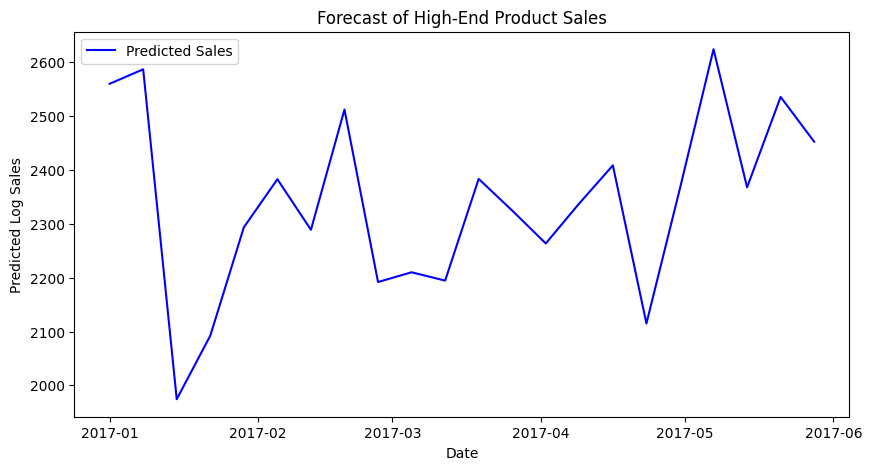

In [40]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(pred_MET_hi, label='Predicted Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Predicted Log Sales')
plt.title('Forecast of High-End Product Sales')
plt.legend()
plt.show()



In [42]:
# Calculate and print the MAPE
MET_hi_v = bev_xts_valid["MET.hi"]
MAPE = 100 * np.mean(np.abs((pred_MET_hi - MET_hi_v) / MET_hi_v))

print("MAPE:", MAPE)

MAPE: 29.574546552197667
